In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = pd.read_csv("../Dataset/Data_COVID19_Engl_sh_processed.csv")


#### Hypothesis 3 

####  (H0): There is no significant relationship between individuals' emotional states and their overall well-being.

#### (H1): There is a significant relationship between individuals' emotional states and their overall well-being.

#### We will perform Correlation analysis and further regression analysis to determine the relationship between individuals' emotional states and their overall well-being.


### Positive Emotions

* sur1_n = I am currently calm 
* sur2_n = I feel safe 
* sur5_n = I am at peace right now 
* sur8_n = I feel physically and mentally rested 
* sur10_n = I feel comfortable right now
* sur11_n = I have confidence 
* sur15_n = I feel relieved
* sur16_n = I am happy with my current situation
* sur19_n = I am happy right now 
* sur20_n = I am in good spirits right now 

### Negative Emotions

* sur3_n = I am nervous right now 
* sur4_n = I feel regret 
* sur6_n = I am not having fun right now 
* sur7_n = I worry about what will happen to me
* sur9_n = I am concerned about my health
* sur12_n = I am in bad temper right now
* sur13_n = I am so angry 
* sur14_n = I fele my nerves are so tense 
* sur17_n = I am worried right now 
* sur18_n = I feel stunned with excitement 

#### Spearmans Correlation Analysis

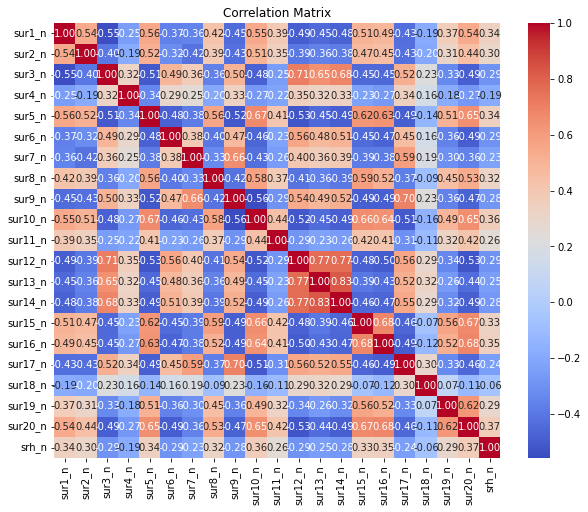

In [5]:
columnns_for_corr = ['sur1_n', 'sur2_n', 'sur3_n', 'sur4_n', 'sur5_n', 'sur6_n', 'sur7_n', 'sur8_n', 'sur9_n', 'sur10_n', 'sur11_n', 'sur12_n', 'sur13_n', 'sur14_n', 'sur15_n', 'sur16_n', 'sur17_n', 'sur18_n', 'sur19_n', 'sur20_n', 'srh_n']
corr = data[columnns_for_corr].corr(method='spearman')
corr.to_csv('../Results/hypo3_correlation_matrix.csv', index=False)
corr_df = pd.read_csv('../Results/hypo3_correlation_matrix.csv')

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
regression_cols_pos = ['sur1_n', 'sur2_n', 'sur5_n', 'sur8_n',
                       'sur10_n', 'sur11_n', 'sur15_n', 'sur16_n', 'sur19_n', 'sur20_n']
regression_cols_neg = ['sur3_n', 'sur4_n', 'sur6_n', 'sur7_n',
                       'sur9_n',  'sur12_n', 'sur13_n', 'sur14_n', 'sur17_n', 'sur18_n']


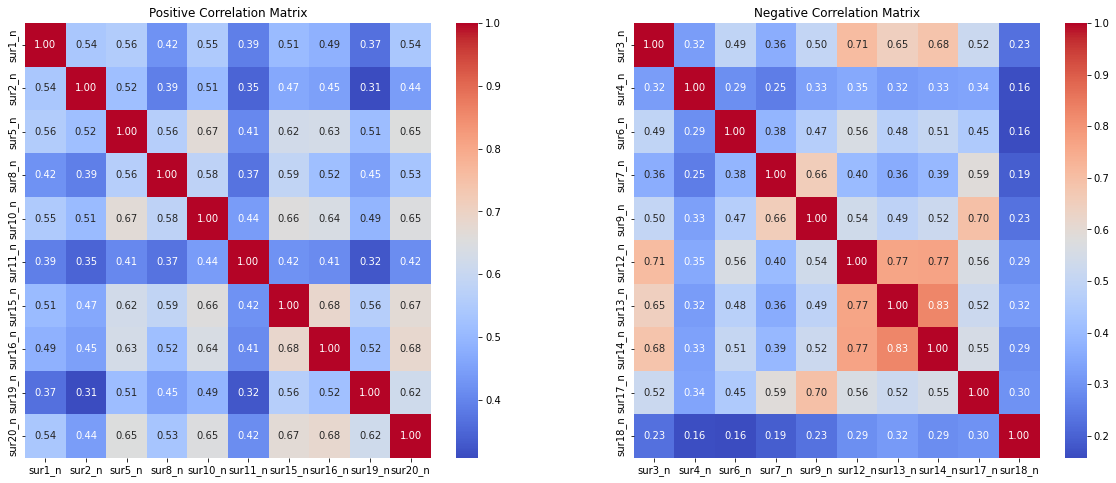

In [7]:
corr_pos = data[regression_cols_pos].corr(method='spearman')
corr_neg = data[regression_cols_neg].corr(method='spearman')

# subplot for positive correlation and negative correlation
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(corr_pos, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title('Positive Correlation Matrix')

sns.heatmap(corr_neg, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[1])
ax[1].set_title('Negative Correlation Matrix')

plt.show()


In [8]:
# prit corr matrix 
corr_pos.to_csv('../Results/correlation_matrix_pos.csv', index=False)
corr_neg.to_csv('../Results/correlation_matrix_neg.csv', index=False)

corr_pos_df = pd.read_csv('../Results/correlation_matrix_pos.csv')
corr_neg_df = pd.read_csv('../Results/correlation_matrix_neg.csv')

print(corr_pos_df)
print(corr_neg_df)

     sur1_n    sur2_n    sur5_n    sur8_n   sur10_n   sur11_n   sur15_n  \
0  1.000000  0.539203  0.555324  0.423209  0.548534  0.389836  0.506420   
1  0.539203  1.000000  0.516648  0.390552  0.505421  0.345564  0.465437   
2  0.555324  0.516648  1.000000  0.562879  0.666369  0.405947  0.622708   
3  0.423209  0.390552  0.562879  1.000000  0.578181  0.372002  0.587444   
4  0.548534  0.505421  0.666369  0.578181  1.000000  0.440105  0.655259   
5  0.389836  0.345564  0.405947  0.372002  0.440105  1.000000  0.421560   
6  0.506420  0.465437  0.622708  0.587444  0.655259  0.421560  1.000000   
7  0.485203  0.448764  0.629247  0.516466  0.638468  0.410854  0.683617   
8  0.366716  0.307373  0.512298  0.449928  0.492942  0.323786  0.563316   
9  0.537930  0.443415  0.651868  0.532940  0.649333  0.415322  0.667293   

    sur16_n   sur19_n   sur20_n  
0  0.485203  0.366716  0.537930  
1  0.448764  0.307373  0.443415  
2  0.629247  0.512298  0.651868  
3  0.516466  0.449928  0.532940  
4  0

In [9]:
# find correlation of postive emotion with srh 
print("Correlation of positive emotion with SRH")
corr_pos_srh = data[regression_cols_pos + ['srh_n']].corr(method='spearman')
corr_pos_srh = corr_pos_srh['srh_n'].sort_values(ascending=False)
print(corr_pos_srh)
print("\n")

# find correlation of negative emotion with srh
print("Correlation of negative emotion with SRH")
corr_neg_srh = data[regression_cols_neg + ['srh_n']].corr(method='spearman')
corr_neg_srh = corr_neg_srh['srh_n'].sort_values(ascending=False)
print(corr_neg_srh)


Correlation of positive emotion with SRH
srh_n      1.000000
sur20_n    0.369214
sur10_n    0.361008
sur16_n    0.346751
sur1_n     0.340563
sur5_n     0.340153
sur15_n    0.326391
sur8_n     0.315575
sur2_n     0.301359
sur19_n    0.292507
sur11_n    0.257435
Name: srh_n, dtype: float64


Correlation of negative emotion with SRH
srh_n      1.000000
sur18_n   -0.062510
sur4_n    -0.189696
sur7_n    -0.225963
sur17_n   -0.244957
sur13_n   -0.247068
sur14_n   -0.276592
sur9_n    -0.282279
sur3_n    -0.290194
sur12_n   -0.291267
sur6_n    -0.292725
Name: srh_n, dtype: float64


Positive Emotions (Correlation with SRH):

Among positive emotions, the highest positive correlation with SRH is observed for sur20_n (feeling happy right now), followed by sur10_n (feeling comfortable right now) and sur16_n (being happy with the current situation). These emotions have correlations ranging from approximately 0.34 to 0.37, indicating a moderate positive relationship with SRH. Other positive emotions also show positive correlations with SRH, albeit slightly lower.
Negative Emotions (Correlation with SRH):

Conversely, among negative emotions, the highest negative correlation with SRH is observed for sur6_n (not having fun right now), followed by sur12_n (being in a bad temper right now) and sur3_n (feeling nervous right now). These emotions have correlations ranging from approximately -0.29 to -0.29, indicating a moderate negative relationship with SRH. Other negative emotions also show negative correlations with SRH, with sur18_n (feeling stunned with excitement) exhibiting the weakest correlation.

##### Based on these correlations:

Higher levels of positive emotions are associated with better self-rated health, while higher levels of negative emotions are associated with poorer self-rated health.
Emotions such as feeling happy, comfortable, and at peace are positively linked with SRH, while feelings of nervousness, anger, and tension are negatively associated with SRH.

                            OLS Regression Results                            
Dep. Variable:                  srh_n   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     32.30
Date:                Tue, 07 May 2024   Prob (F-statistic):          7.71e-111
Time:                        22:11:47   Log-Likelihood:                -4084.8
No. Observations:                2853   AIC:                             8212.
Df Residuals:                    2832   BIC:                             8337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1884      0.113     28.101      0.0

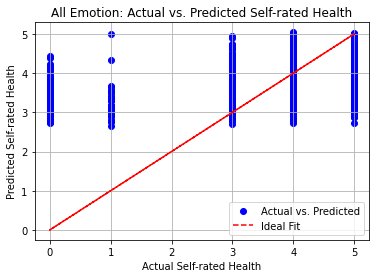

In [10]:
import statsmodels.api as sm

total_cols = regression_cols_pos + regression_cols_neg
X = data[total_cols]
y = data['srh_n']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary_text = model_summary.as_text()
with open('../Results/hypo3_regression_summary.txt', 'w') as f:
    f.write(model_summary_text)

print(model_summary)

coefficients = model.params

# Generate predicted values using the model
predicted = model.predict(X)

# Plotting the scatter plot of the data points
# Plotting the scatter plot
plt.scatter(y, predicted, color='blue', label='Actual vs. Predicted')

# Plotting the regression line
plt.plot(y, y, color='red', label='Ideal Fit', linestyle='--')
# plt.plot(y, predicted, color='green', label='Fitted Line')

plt.xlabel('Actual Self-rated Health')
plt.ylabel('Predicted Self-rated Health')
plt.title('All Emotion: Actual vs. Predicted Self-rated Health')
plt.legend()
plt.grid(True)
plt.show()


**Overall Model Fit:** The model's R-squared value (0.175) suggests that approximately 17.5% of the variance in self-rated health can be explained by the predictor variables included in the model.

**Significance of the Model:** The F-statistic (60.26) and its associated p-value (3.47e-111) indicate that the overall model is statistically significant, suggesting that at least one of the predictor variables has a non-zero effect on self-rated health.

**Individual Predictor Variables:**

Among the positive emotional states, variables such as sur1_n (I am currently calm), sur2_n (I feel safe), sur8_n (I feel physically and mentally rested), sur10_n (I feel comfortable right now), sur11_n (I have confidence), sur16_n (I am happy with my current situation), and sur20_n (I am in good spirits right now) have statistically significant positive coefficients. This implies that higher levels of these positive emotional states are associated with higher self-rated health scores.
However, some positive emotional states like sur5_n (I am at peace right now), sur15_n, and sur19_n do not appear to have statistically significant effects on self-rated health based on their p-values.
Constant Term: The constant term (intercept) represents the expected value of self-rated health when all predictor variables are zero. In this case, the constant term is 2.8318.


                            OLS Regression Results                            
Dep. Variable:                  srh_n   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     42.55
Date:                Tue, 07 May 2024   Prob (F-statistic):           4.01e-79
Time:                        22:11:47   Log-Likelihood:                -4178.9
No. Observations:                2853   AIC:                             8380.
Df Residuals:                    2842   BIC:                             8445.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5405      0.043    105.259      0.0

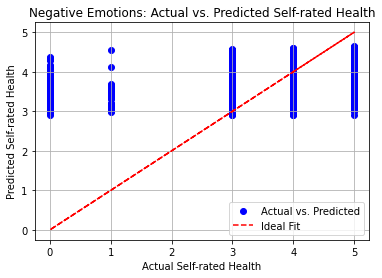

In [11]:
X = data[regression_cols_neg]
y = data['srh_n']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary_text = model_summary.as_text()
with open('../Results/hypo3_regression_summary_neg.txt', 'w') as f:
    f.write(model_summary_text)

print(model_summary)

coefficients = model.params

# Generate predicted values using the model
predicted = model.predict(X)

# Plotting the scatter plot of the data points
plt.scatter(y, predicted, color='blue', label='Actual vs. Predicted')

# Plotting the regression line
plt.plot(y, y, color='red', label='Ideal Fit', linestyle='--')
# plt.plot(y, predicted, color='green', label='Fitted Line')

plt.xlabel('Actual Self-rated Health')
plt.ylabel('Predicted Self-rated Health')
plt.title('Negative Emotions: Actual vs. Predicted Self-rated Health')
plt.legend()
plt.grid(True)
plt.show()


**Overall Model Fit: **The model's R-squared value (0.130) suggests that approximately 13% of the variance in self-rated health can be explained by the predictor variables included in the model.

**Significance of the Model:** The F-statistic (42.55) and its associated p-value (4.01e-79) indicate that the overall model is statistically significant, suggesting that at least one of the predictor variables has a non-zero effect on self-rated health.

**Individual Predictor Variables:**

Among the negative emotional states, variables such as sur3_n (I am nervous right now), sur4_n (I feel regret), sur6_n (I am not having any fun right now), sur9_n (I am concerned about my health), and sur12_n (I am in a bad temper right now) have statistically significant negative coefficients. This implies that higher levels of these negative emotional states are associated with lower self-rated health scores.
However, some negative emotional states like sur13_n (I am so angry), sur14_n (I feel my nerves are very tense), sur17_n, and sur18_n do not appear to have statistically significant effects on self-rated health based on their p-values.

**Positive Emotional States:** The regression analyses consistently show that several positive emotional states, such as feeling calm, safe, rested, comfortable, confident, happy, and in good spirits, are associated with higher self-rated health scores. These findings suggest that individuals who experience these positive emotions tend to rate their health more favorably.

**Negative Emotional States:** Conversely, certain negative emotional states, including feeling nervous, regretful, not having fun, worried about the future, concerned about health, in a bad temper, and angry, are associated with lower self-rated health scores. This implies that experiencing these negative emotions may lead individuals to perceive their health more negatively.

#### Correlation Analysis:

The correlation analysis shows the relationship between individuals' emotional states and their self-rated health (SRH).
Positive emotions such as feeling calm, safe, at peace, rested, comfortable, confident, relieved, and happy are positively correlated with SRH.
Negative emotions such as feeling nervous, regretful, not having fun, worried, concerned about health, in a bad temper, angry, tense, and stunned with excitement are negatively correlated with SRH.
#### Regression Analysis:

The regression analysis further investigates the relationship between emotional states and SRH, considering multiple emotional variables simultaneously.
The regression results indicate that certain positive emotions (e.g., feeling calm, safe, rested, etc.) have a significant positive impact on SRH.
Conversely, certain negative emotions (e.g., feeling nervous, regretful, not having fun, etc.) have a significant negative impact on SRH.
However, the overall model fit for both positive and negative emotions is relatively low, suggesting that emotions alone may not fully explain the variability in SRH.
#### Conclusion:
Based on the correlation and regression results, we can conclude that there is indeed a significant relationship between individuals' emotional states and their overall well-being, supporting Hypothesis 3. Positive emotions tend to be associated with higher self-rated health, while negative emotions tend to be associated with lower self-rated health. However, it's essential to acknowledge that emotions may not be the sole determinants of well-being, and other factors may also influence individuals' self-rated health.